## Project Title: Flight Price Prediction Using Machine Learning

## Introduction
In this project, I aim to build a machine learning model that can accurately predict flight ticket prices based on various factors such as airline, source, destination, departure time, duration, and other relevant features.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("C:/Users/knowl/OneDrive/Desktop/Flight Price.xlsx")

In [5]:
df.head()

,FlightID,Airline,OriginAirport,DestinationAirport,Distance,DateOfFlight,DayOfWeek,TimeOfDay,FlightDuration,AircraftType,...,AdvanceBookingDays,HolidayPeriod,LuggageAllowance,MealIncluded,WifiAvailable,InFlightEntertainment,FuelSurcharge,AirportTraffic,WeatherConditions,FlightPrice
0,1,Lufthansa,HND,CDG,3396.679118,2021-02-20,Saturday,Afternoon,1.872270,Airbus A380,...,231,No,18,Yes,Yes,Yes,70.855746,Low,Cloudy,592.854383
1,2,Southwest Airlines,ORD,LHR,7950.058334,2022-03-06,Sunday,Evening,4.822261,Airbus A320,...,36,Yes,28,Yes,No,Yes,37.036296,Medium,Rainy,1453.998701
2,3,Emirates,JFK,LHR,6394.758008,2023-04-03,Monday,Afternoon,1.053792,Boeing 777,...,312,No,24,No,Yes,No,80.715658,Low,Rainy,75.562580
3,4,American Airlines,JFK,DXB,7143.774365,2022-01-22,Saturday,Afternoon,10.900984,Boeing 737,...,302,Yes,24,No,No,No,87.072948,Low,Rainy,1496.028578
4,5,Singapore Airlines,LAX,JFK,5938.995500,2022-10-11,Tuesday,Morning,5.708129,Boeing 737,...,154,No,24,Yes,No,Yes,21.962131,Medium,Snowy,431.827846


In [6]:
df.shape

(10000, 22)

In [7]:
df.info

<bound method DataFrame.info of       FlightID             Airline OriginAirport DestinationAirport  \
0            1           Lufthansa           HND                CDG   
1            2  Southwest Airlines           ORD                LHR   
2            3            Emirates           JFK                LHR   
3            4   American Airlines           JFK                DXB   
4            5  Singapore Airlines           LAX                JFK   
...        ...                 ...           ...                ...   
9995      9996   American Airlines           LHR                DXB   
9996      9997            Emirates           SIN                LAX   
9997      9998     British Airways           DFW                DFW   
9998      9999   American Airlines           JFK                HND   
9999     10000            Emirates           ORD                SIN   

         Distance DateOfFlight DayOfWeek  TimeOfDay  FlightDuration  \
0     3396.679118   2021-02-20  Saturday  Af

In [8]:
df.columns

Index(['FlightID', 'Airline', 'OriginAirport', 'DestinationAirport',
       'Distance', 'DateOfFlight', 'DayOfWeek', 'TimeOfDay', 'FlightDuration',
       'AircraftType', 'ClassType', 'SeatAvailability', 'AdvanceBookingDays',
       'HolidayPeriod', 'LuggageAllowance', 'MealIncluded', 'WifiAvailable',
       'InFlightEntertainment', 'FuelSurcharge', 'AirportTraffic',
       'WeatherConditions', 'FlightPrice'],
      dtype='object')

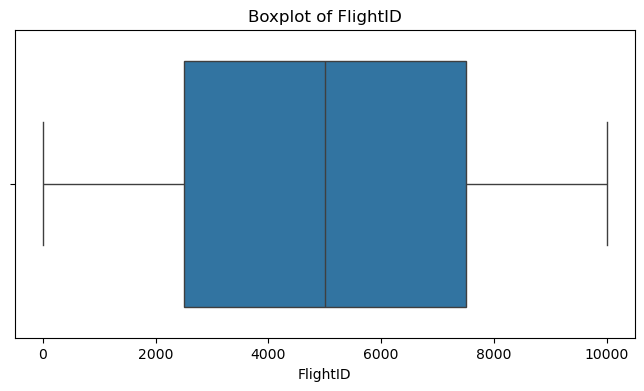

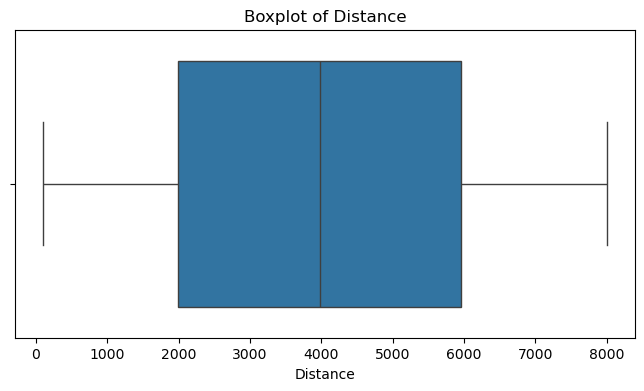

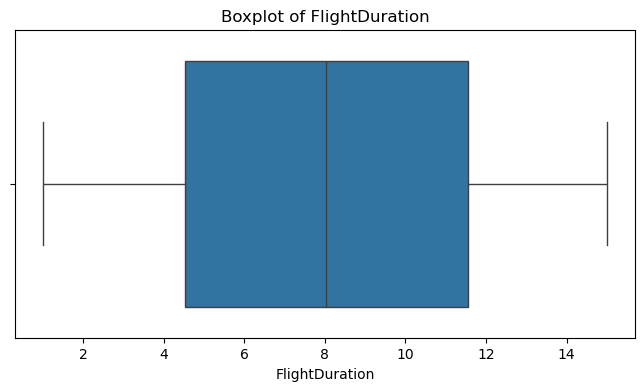

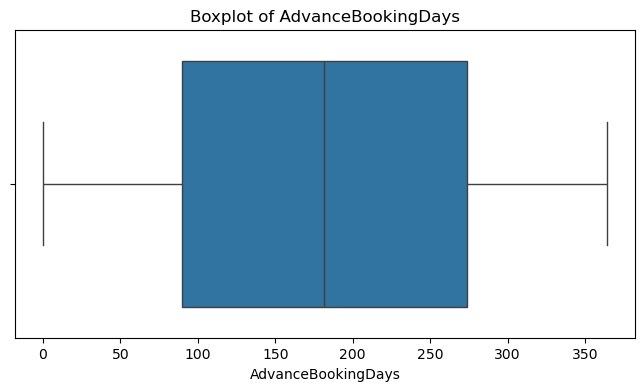

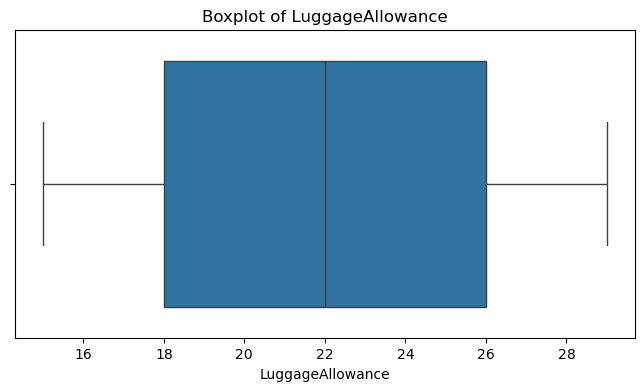

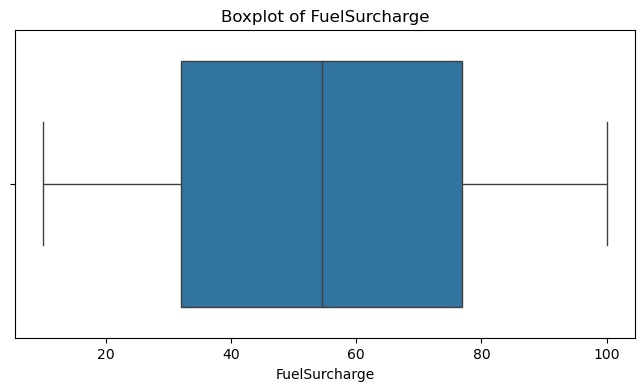

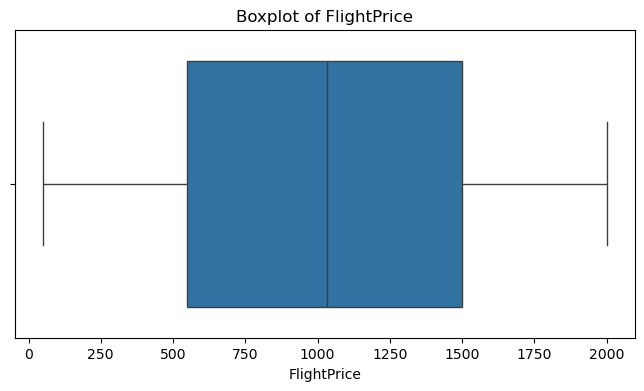

In [9]:
# Only for numeric columns
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [10]:
df.describe()

,FlightID,Distance,DateOfFlight,FlightDuration,AdvanceBookingDays,LuggageAllowance,FuelSurcharge,FlightPrice
count,10000.00000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,4002.655497,2022-12-27 23:33:30.239999744,8.022453,182.095400,21.947000,54.499195,1026.381289
min,1.00000,100.517470,2021-01-01 00:00:00,1.000411,0.000000,15.000000,10.010041,50.208206
25%,2500.75000,1994.904670,2021-12-30 00:00:00,4.536586,90.000000,18.000000,32.069919,548.952366
50%,5000.50000,3977.828957,2022-12-27 00:00:00,8.030191,181.500000,22.000000,54.497174,1030.797752
75%,7500.25000,5960.401149,2023-12-27 00:00:00,11.552186,274.000000,26.000000,76.818632,1499.946259
max,10000.00000,7999.644082,2024-12-31 00:00:00,14.996624,364.000000,29.000000,99.995241,1999.882295
std,2886.89568,2290.671305,NaN,4.046264,105.724644,4.303422,25.781254,559.876417


In [11]:
df.isnull().sum()

FlightID                 0
Airline                  0
OriginAirport            0
DestinationAirport       0
Distance                 0
DateOfFlight             0
DayOfWeek                0
TimeOfDay                0
FlightDuration           0
AircraftType             0
ClassType                0
SeatAvailability         0
AdvanceBookingDays       0
HolidayPeriod            0
LuggageAllowance         0
MealIncluded             0
WifiAvailable            0
InFlightEntertainment    0
FuelSurcharge            0
AirportTraffic           0
WeatherConditions        0
FlightPrice              0
dtype: int64

I do not have any missing values in my dataset. 

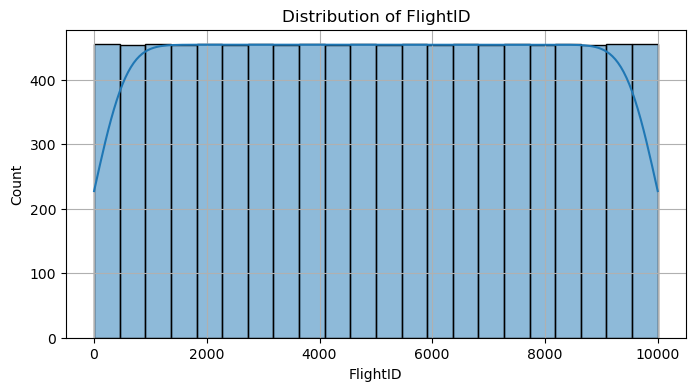

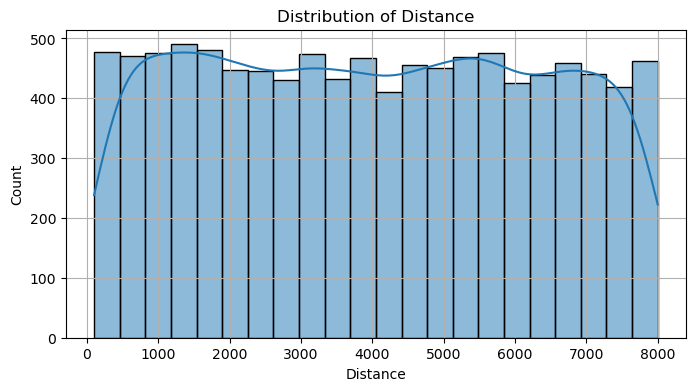

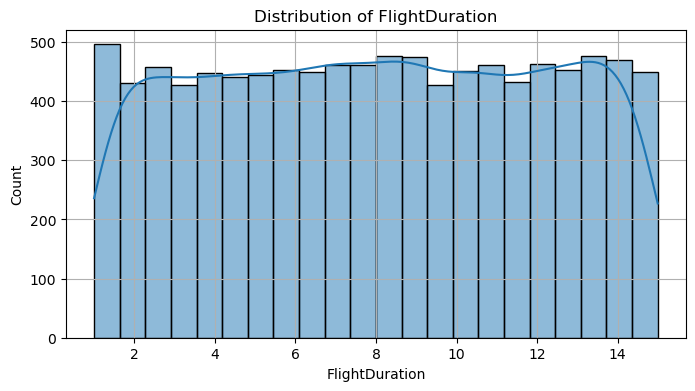

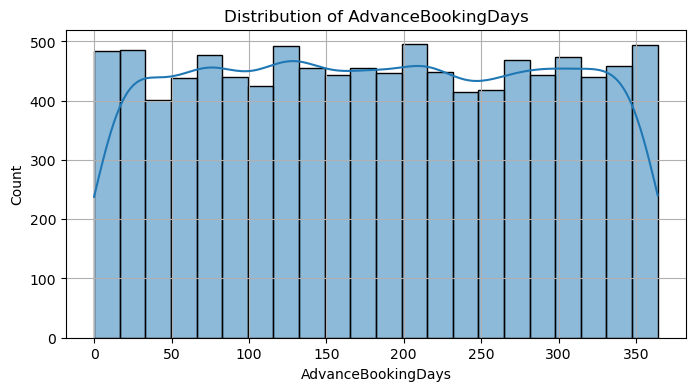

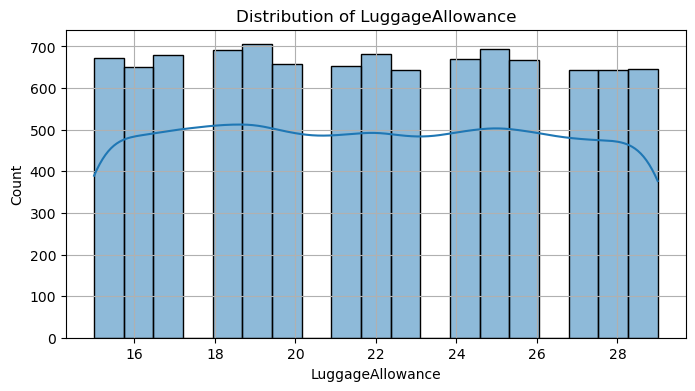

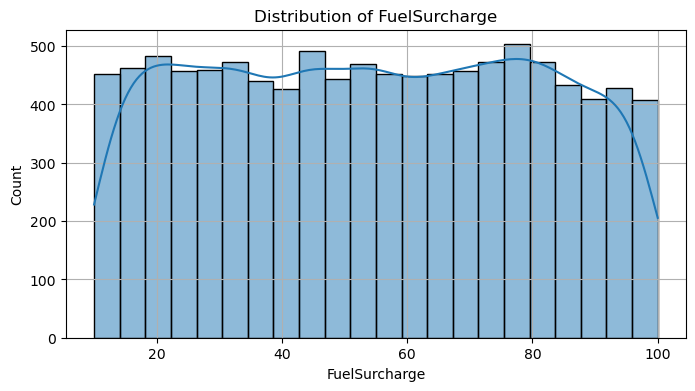

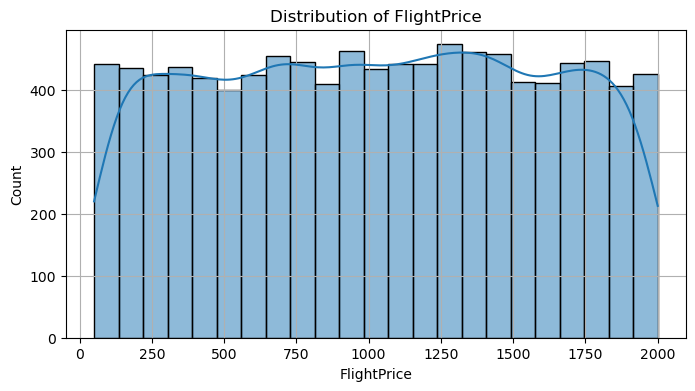

In [13]:

# Plot distribution for numerical columns
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

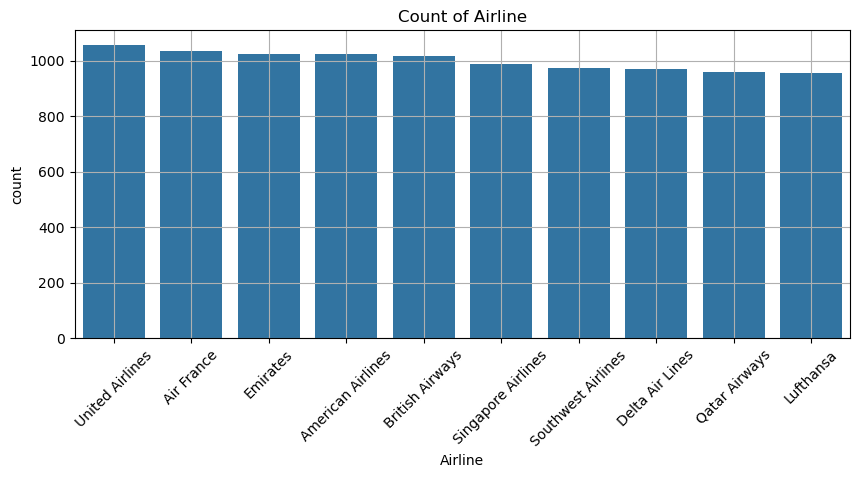

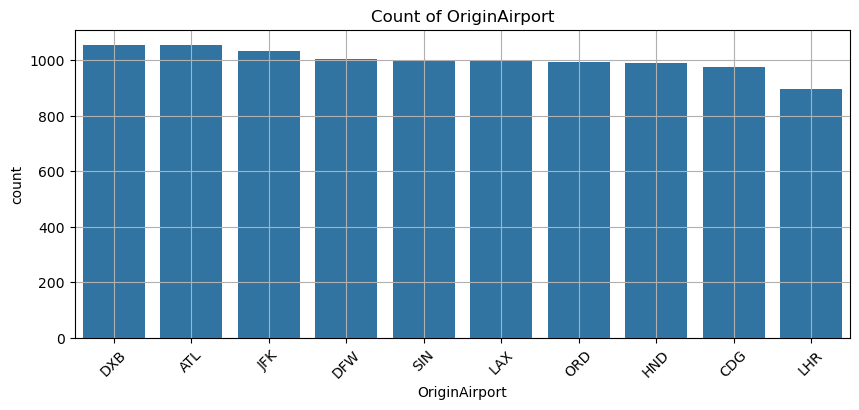

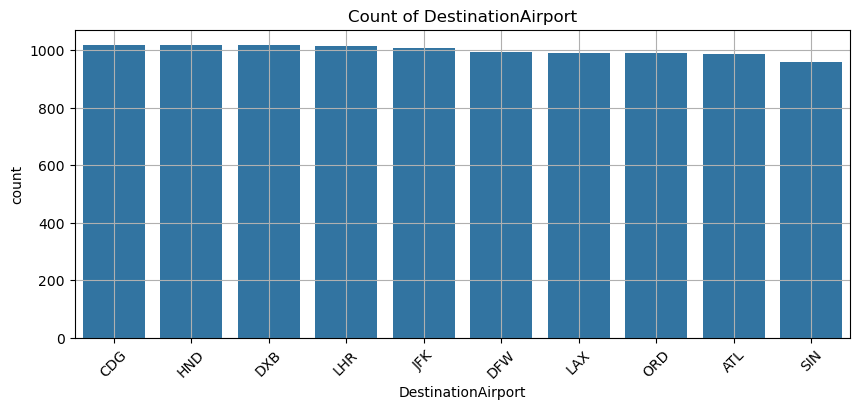

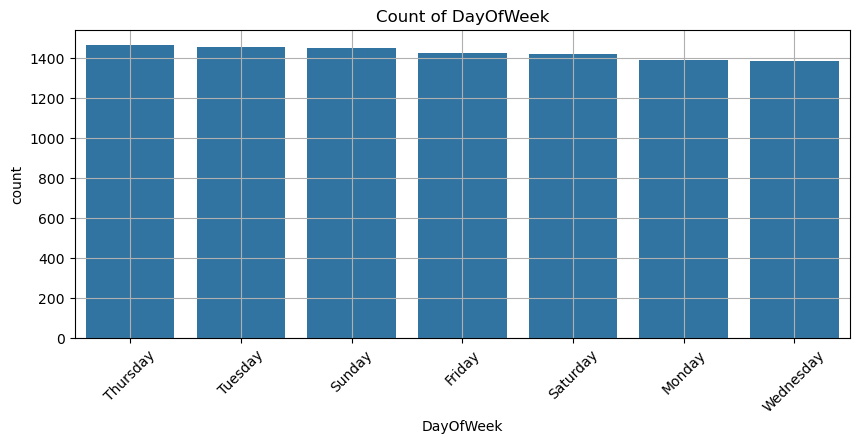

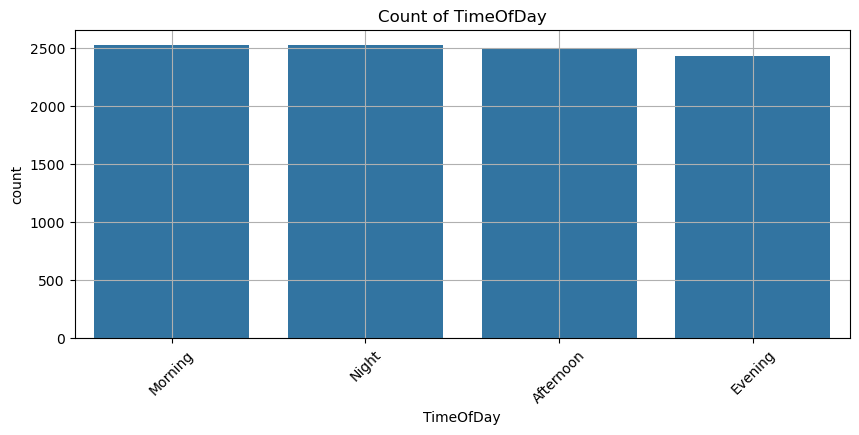

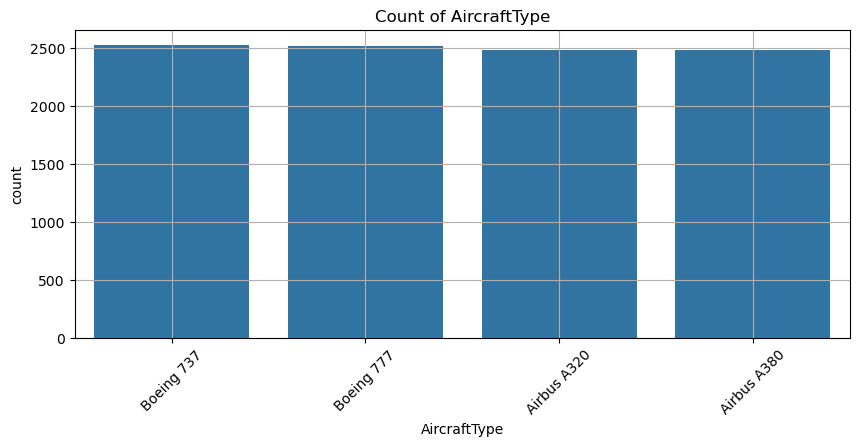

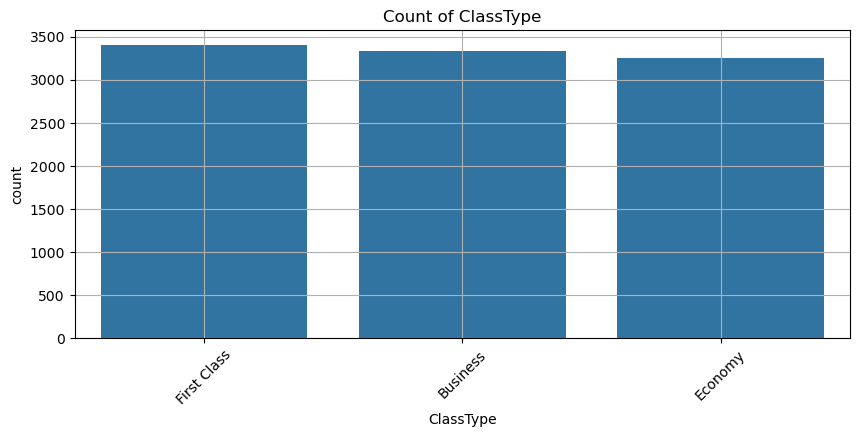

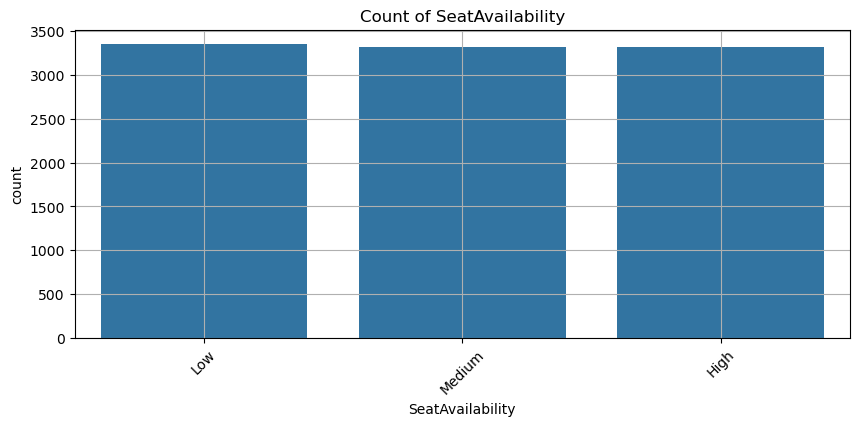

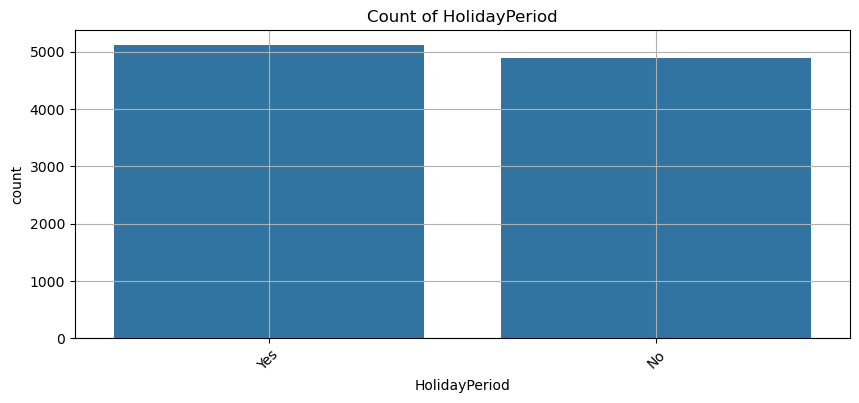

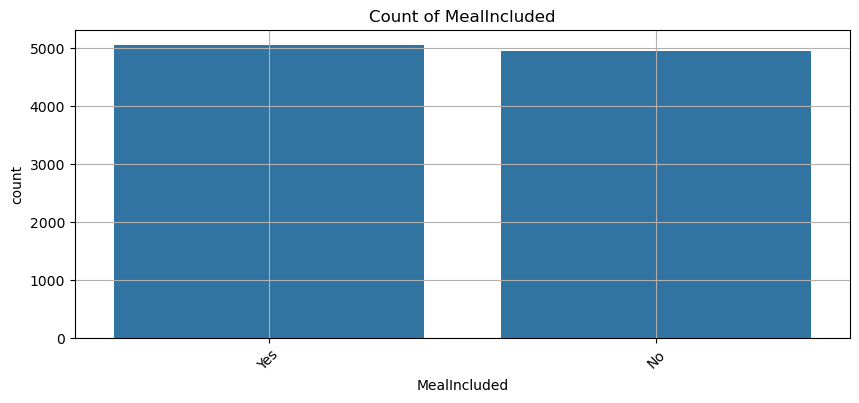

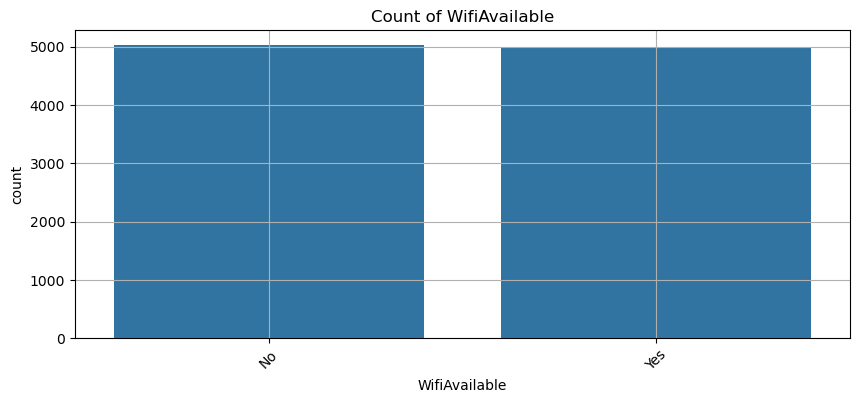

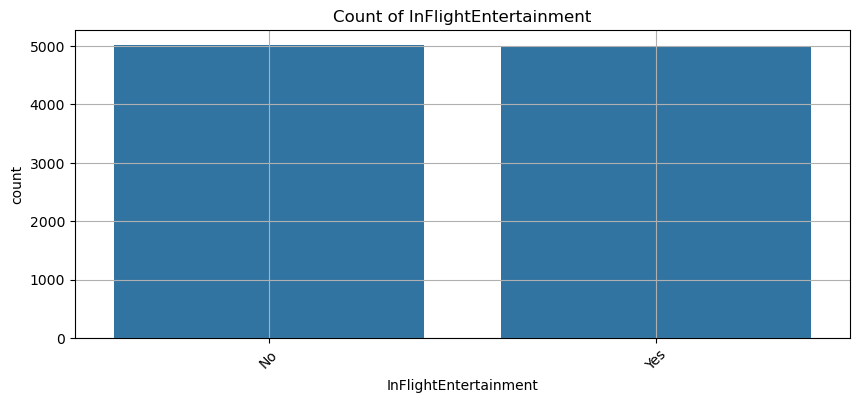

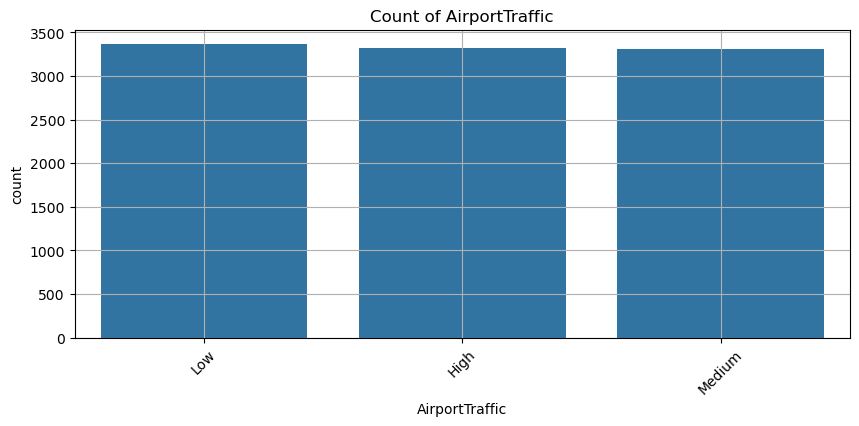

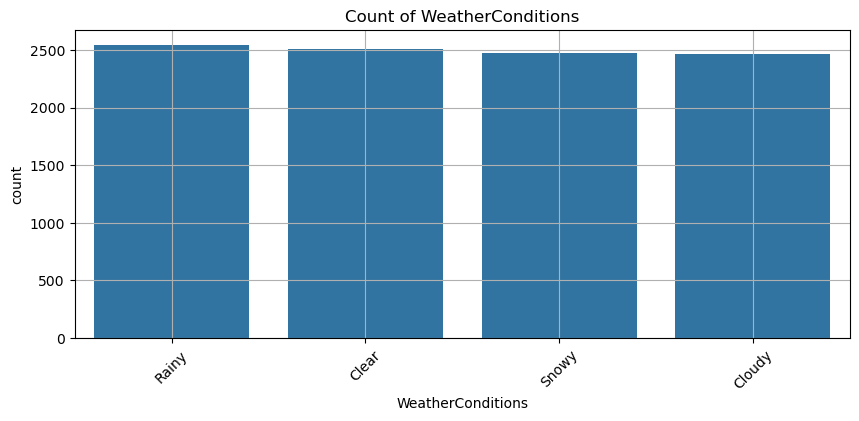

In [14]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


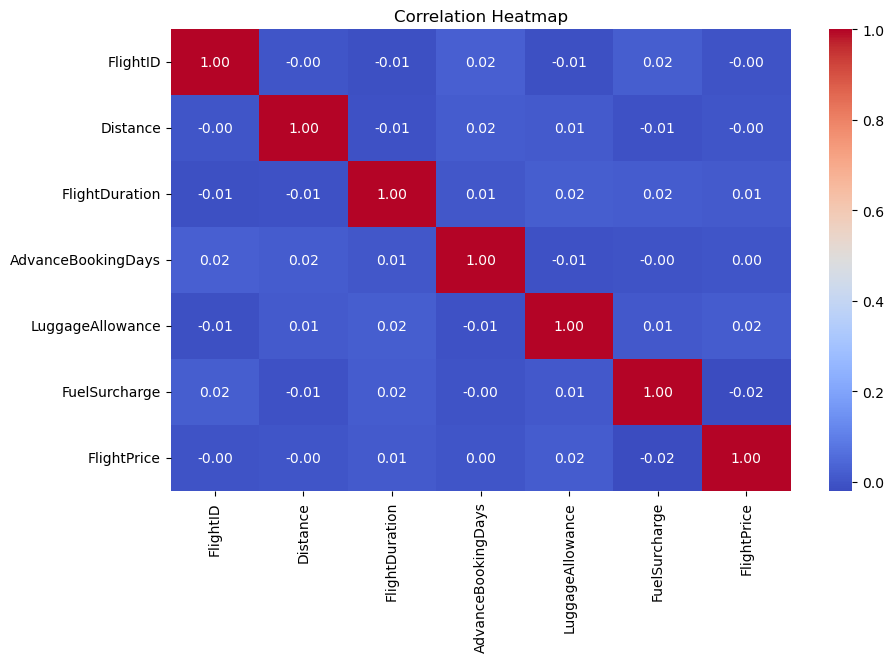

In [15]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [49]:

y = df['FlightPrice']
X = df.drop('FlightPrice', axis=1)

In [17]:
# Create dummy variables
X = pd.get_dummies(X, drop_first=True)



In [18]:
# Convert only True/False (boolean) columns to 1/0
X = X.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)


In [19]:
print(X.dtypes.value_counts())


int32             52
int64              3
float64            3
datetime64[ns]     1
Name: count, dtype: int64


In [20]:
X.head()

,FlightID,Distance,DateOfFlight,FlightDuration,AdvanceBookingDays,LuggageAllowance,FuelSurcharge,Airline_American Airlines,Airline_British Airways,Airline_Delta Air Lines,...,SeatAvailability_Medium,HolidayPeriod_Yes,MealIncluded_Yes,WifiAvailable_Yes,InFlightEntertainment_Yes,AirportTraffic_Low,AirportTraffic_Medium,WeatherConditions_Cloudy,WeatherConditions_Rainy,WeatherConditions_Snowy
0,1,3396.679118,2021-02-20,1.872270,231,18,70.855746,0,0,0,...,1,0,1,1,1,1,0,1,0,0
1,2,7950.058334,2022-03-06,4.822261,36,28,37.036296,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2,3,6394.758008,2023-04-03,1.053792,312,24,80.715658,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,4,7143.774365,2022-01-22,10.900984,302,24,87.072948,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,5,5938.995500,2022-10-11,5.708129,154,24,21.962131,0,0,0,...,1,0,1,0,1,0,1,0,0,1


In [43]:
# Drop datetime
X = X.drop(columns=['DateOfFlight', 'FlightID'], errors='ignore')


In [51]:
X = df[['LuggageAllowance', 'AdvanceBookingDays', 'FuelSurcharge']]
y = df['FlightPrice']


In [53]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [55]:
# Train Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = lr_model.predict(X_test)

print("📊 Multiple Linear Regression with 3 Features:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

📊 Multiple Linear Regression with 3 Features:
R² Score: 0.0005870948545033672
MAE: 485.87002191634025
RMSE: 560.6821849676595


Model performance is weak, after selecting the “best” 3 features by correlation.

Linear Regression is too limited for this dataset — especially because:

All features show low correlation with FlightPrice.

R² Score ≈ 0.0006, Less than 1% of the variation in flight prices is explained by the model.

## Using Random Forest to check the accuracy of the model.

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [72]:
X = df[['LuggageAllowance', 'AdvanceBookingDays', 'FuelSurcharge']]
y = df['FlightPrice']

In [74]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [78]:
# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest Regression Results:
R² Score: -0.11404189542150434
MAE: 505.6472214454188
RMSE: 591.9636540789614


Even Random Forest is performing poor. Likely causes:

- The selected 3 features have very weak correlation (as shown in the heatmap).

- Not enough signal in the data — the current features don’t explain price well.

- Flight prices depend on other factors which are not included in the dataset. Both the models perform weak because of weak correlations of independent variable and dependent variable. 